(8790, 10)
Nulos por columna:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64
   release_year  conteo
0          1925       1
1          1942       2
2          1943       3
3          1944       3
4          1945       4
   year_added  conteo
0        2008       2
1        2009       2
2        2010       1
3        2011      13
4        2012       3
      type  duration_num
0    Movie     99.584884
1  TV Show      1.751877
       type    rating  conteo
0     Movie         G      41
1     Movie     NC-17       3
2     Movie        NR      75
3     Movie        PG     287
4     Movie 

NameError: name 'plt' is not defined

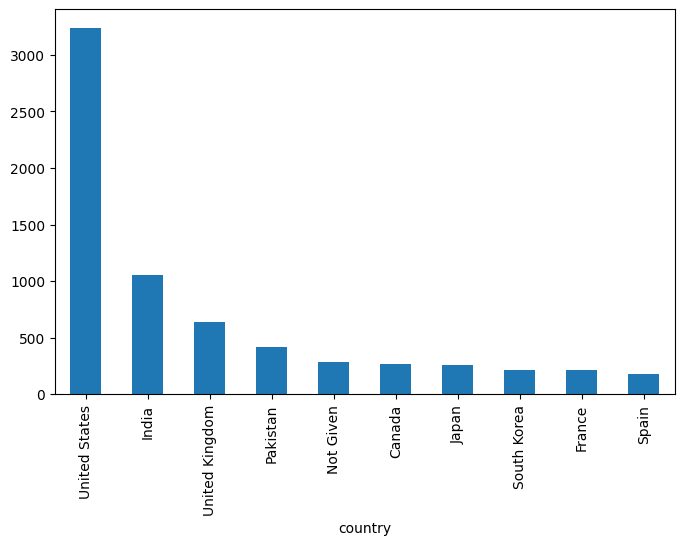

In [13]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("netflix1.csv")

# Ver primeras filas
print(df.shape)   # dimensiones
df.head()

df.columns


# --- LIMPIEZA BASICA ---

# 1) Revisar valores nulos por columna
print("Nulos por columna:")
print(df.isna().sum())

# 2) Convertir 'date_added' a fecha (datetime)
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# 3) Separar la columna 'duration' en número y unidad
# Ejemplo: "90 min" → 90 y "min"; "1 Season" → 1 y "Season"
df[["duration_num", "duration_unit"]] = df["duration"].str.extract(r'(\d+)\s*(\D+)')

# Convertir el número a entero donde sea posible
df["duration_num"] = pd.to_numeric(df["duration_num"], errors="coerce")

# 4) Quitar espacios extras en columnas de texto
for col in ["type", "title", "director", "country", "rating", "duration_unit"]:
    df[col] = df[col].astype(str).str.strip()

# 5) Vista previa de cómo quedó
df.head(10)
# Países con más títulos
top_paises = (df['country']
              .value_counts()
              .head(10))

print(top_paises)

# Evolución por año de estreno
estreno = (df.groupby("release_year")["show_id"]
             .count()
             .reset_index()
             .rename(columns={"show_id":"conteo"}))

print(estreno.head())
# Año en que se añadió a Netflix
df["year_added"] = df["date_added"].dt.year

incorporacion = (df.groupby("year_added")["show_id"]
                   .count()
                   .reset_index()
                   .rename(columns={"show_id":"conteo"}))

print(incorporacion.head())
# Duración promedio según tipo
duracion_promedio = (df.groupby("type")["duration_num"]
                       .mean()
                       .reset_index())

print(duracion_promedio)

# Distribución de clasificaciones por tipo
clasificaciones = (df.groupby(["type","rating"])["show_id"]
                     .count()
                     .reset_index()
                     .rename(columns={"show_id":"conteo"}))

print(clasificaciones.head(15))

# 'listed_in' trae géneros separados por comas → los separamos
generos = (df['listed_in']
           .dropna()
           .str.split(', ')
           .explode()
           .value_counts()
           .head(10))

print(generos)

top_paises.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 países con más contenido en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()
